Github repo link:
https://github.com/lucianbluescher/eds220-hwk4/tree/main

In [ ]:
import pandas as pd
import numpy as np
import os
import geopandas as gpd
import xarray as xr
import matplotlib as plt

In [57]:
fp = os.path.join('data', 'Eaton_Perimeter_20250121', 'Eaton_Perimeter_20250121.shp')
eaton = gpd.read_file(fp)

fp = os.path.join('data', 'Palisades_Perimeter_20250121', 'Palisades_Perimeter_20250121.shp')
palisades = gpd.read_file(fp)

landsat = xr.open_dataset("data/landsat8-2025-02-23-palisades-eaton.nc", engine="netcdf4")

# Fire perimeter data exploration

In [58]:
print(f"The CRS for the Eaton Perimeter is {eaton.crs}")
print(f"The CRS for the Palisades Perimeter is {palisades.crs}")
print(f"The Eaton Perimeter is projected. That statement is {eaton.crs.is_projected}")
print(f"The Palisades Perimeter is projected. That statement is {palisades.crs.is_projected}")
eaton.info()
palisades.info()

The CRS for the Eaton Perimeter is EPSG:3857
The CRS for the Palisades Perimeter is EPSG:3857
The Eaton Perimeter is projected. That statement is True
The Palisades Perimeter is projected. That statement is True
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    20 non-null     int64   
 1   type        20 non-null     object  
 2   Shape__Are  20 non-null     float64 
 3   Shape__Len  20 non-null     float64 
 4   geometry    20 non-null     geometry
dtypes: float64(2), geometry(1), int64(1), object(1)
memory usage: 932.0+ bytes
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    21 non-null     int64   
 1   type        21 non-null     object  
 2   Shape__Are  21 non-nu

In [59]:
# Landsat Exploration
print(landsat.coords) # View coordinates
print(landsat.var) # View Variables
print(landsat.dims) # View Dimensions

Coordinates:
  * y        (y) float64 11kB 3.799e+06 3.799e+06 ... 3.757e+06 3.757e+06
  * x        (x) float64 22kB 3.344e+05 3.344e+05 ... 4.166e+05 4.166e+05
    time     datetime64[ns] 8B ...
<bound method DatasetAggregations.var of <xarray.Dataset> Size: 78MB
Dimensions:      (y: 1418, x: 2742)
Coordinates:
  * y            (y) float64 11kB 3.799e+06 3.799e+06 ... 3.757e+06 3.757e+06
  * x            (x) float64 22kB 3.344e+05 3.344e+05 ... 4.166e+05 4.166e+05
    time         datetime64[ns] 8B ...
Data variables:
    red          (y, x) float32 16MB ...
    green        (y, x) float32 16MB ...
    blue         (y, x) float32 16MB ...
    nir08        (y, x) float32 16MB ...
    swir22       (y, x) float32 16MB ...
    spatial_ref  int64 8B ...>
FrozenMappingWarningOnValuesAccess({'y': 1418, 'x': 2742})


# Restoring geospatial information

In [60]:
#Use rio.crs to print what is the CRS of this dataset. Is this a geospatial object?

print(landsat.rio.crs)

#You may have noticed on section 3 that the geospatial information for this dataset 
# is stored in the variable spatial_ref. 
# Print the CRS by using accesing the spatial_ref.crs_wkt attribute of the dataset.
print(landsat.spatial_ref.crs_wkt)
landsat_crs = landsat.spatial_ref.crs_wkt

#Recover the geospatial information by using rio.write_crs() 
# and the spatial reference information form part b.
landsat = landsat.rio.write_crs(landsat_crs)

#Print the CRS of the updated dataset.#
print(landsat.rio.crs)


None
PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]]
EPSG:32611


# True Color Image

/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


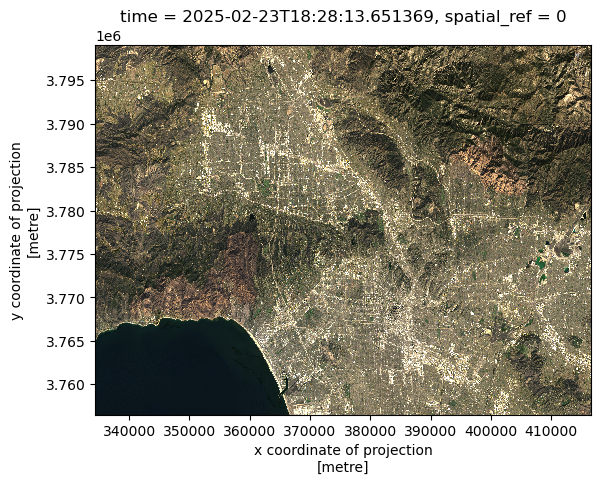

In [61]:
landsat[["red", "green", "blue"]].to_array().plot.imshow(vmin = 7000, vmax = 15000)


red False
green False
blue False
nir08 False
swir22 False


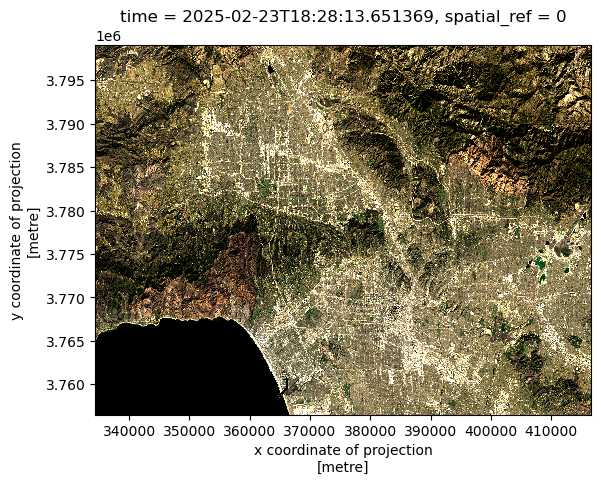

In [94]:
landsat[["red", "green", "blue"]].to_array().plot.imshow(vmin = 8200, vmax = 13500, robust = True)
for band in landsat.data_vars:
    print(band, landsat[band].isnull().any().item())

In [63]:
landsat = landsat.fillna(0)

In [64]:
for band in landsat.data_vars:
    print(band, landsat[band].isnull().any().item())


red False
green False
blue False
nir08 False
swir22 False


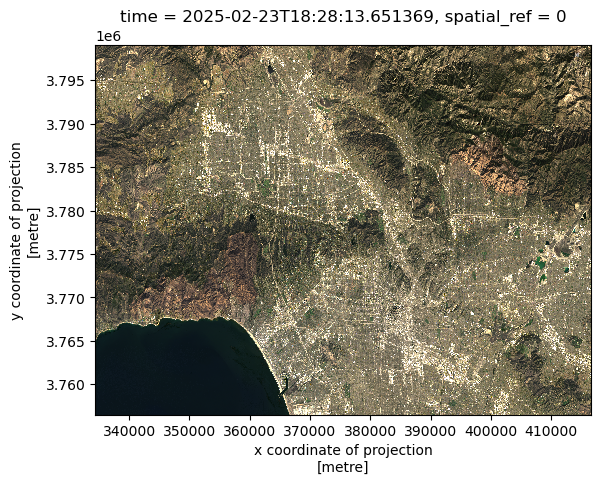

In [65]:
landsat[["red", "green", "blue"]].to_array().plot.imshow(vmin = 7000, vmax = 15000)

The new rendering with NAs set to 0 shows more clearly rhe burned areas of LAs wildfires. It is also closer to the true color because we adjusted the scales. 

# False Color Image

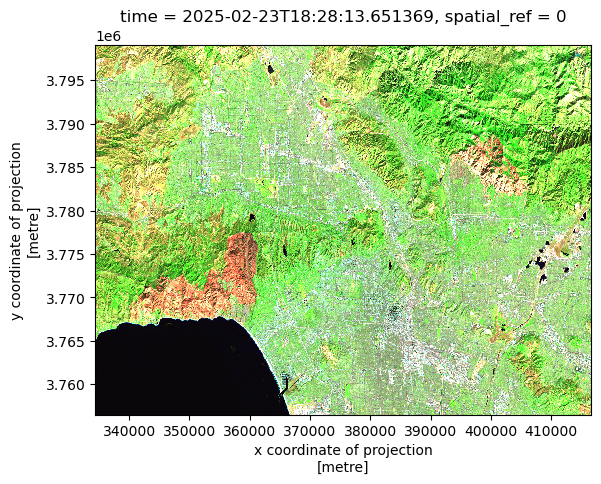

In [66]:
landsat[["swir22", "nir08", "red"]].to_array().plot.imshow(vmin = 7000, vmax = 15000)

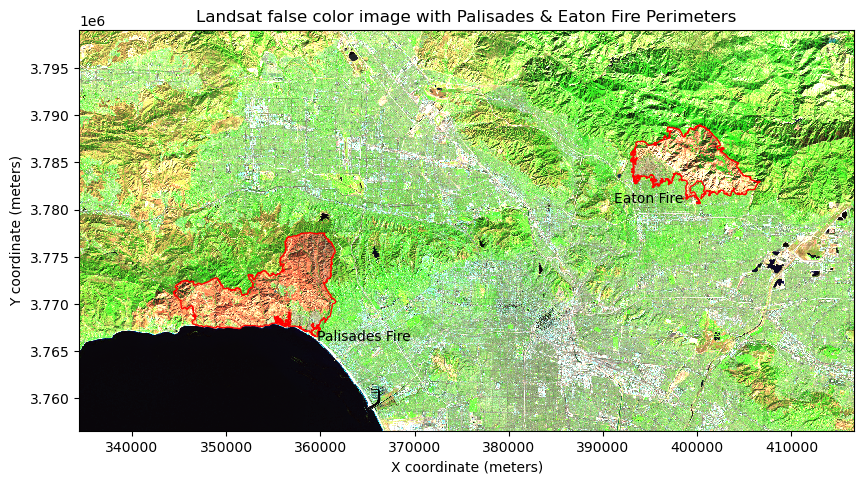

In [93]:

# Double check CRS of perimeter data
palisades = palisades.to_crs(landsat.rio.crs)
eaton = eaton.to_crs(landsat.rio.crs)

# Create the false color image from Landsat
fig, ax = plt.subplots(figsize=(10, 10))

landsat[["swir22", "nir08", "red"]].to_array().plot.imshow(
    ax=ax,
    vmin=7000,
    vmax=15000
)

# Plot fire perimeter polygons on top of the  image
palisades.boundary.plot(ax=ax, color="red", linewidth=1)
eaton.boundary.plot(ax=ax, color="red", linewidth=1)

# Set center points of each perimeter
p_center = palisades.geometry.centroid.iloc[0]
e_center = eaton.geometry.centroid.iloc[0]

# Add labels for each fire
ax.text(p_center.x, p_center.y, "Palisades Fire",
        color="black", fontsize=10, 
        ha="left", va="center")

ax.text(e_center.x, e_center.y, "Eaton Fire",
        color="black", fontsize=10,
        ha="right", va="center")

# Add axis labels and title

ax.set_xlabel("X coordinate (meters)")
ax.set_ylabel("Y coordinate (meters)")
ax.set_title("Landsat false color image with Palisades & Eaton Fire Perimeters")

plt.show()
